In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

In [5]:
filename = "train.csv"
df = pd.read_csv(filename)
print(df.head())

      label                                             review
0  positive  best cheap GPS: The Garmin Etrex, at under $10...
1  positive  YOU MADE ME FEEL I WAS AYLA!: WHEN WILL #5 COM...
2  negative  So good we now buy Brother: Installing one of ...
3  positive  Powerful: Austin brings to life a part of the ...
4  positive  Tao terrific: This read is very informational ...


In [12]:
# Checking some cursory stats

# Label distribution
print(df["label"].value_counts())

label
positive    17811
negative    17133
Name: count, dtype: int64


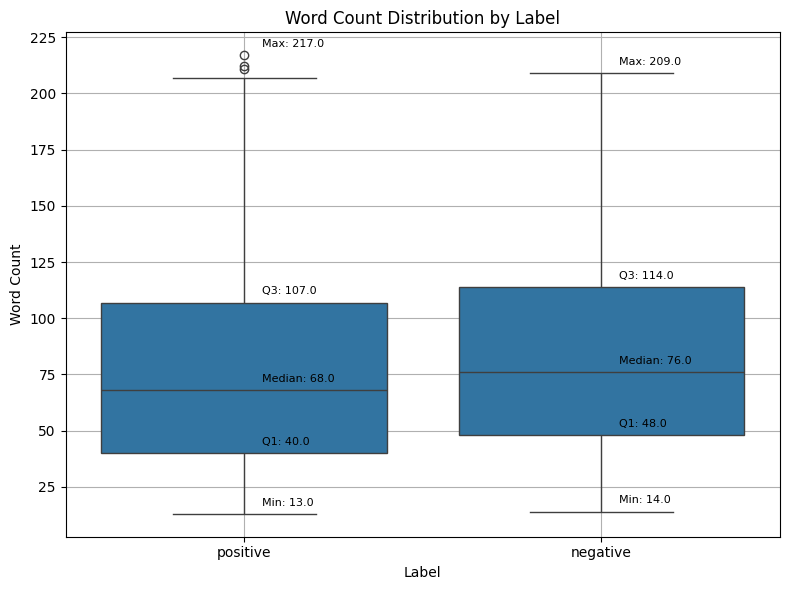

In [26]:
# Create word_count variable for each review
df["word_count"] = df["review"].apply(lambda x: len(str(x).split()))

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='word_count', data=df)
plt.title('Word Count Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Word Count')
plt.grid(True)

# Annotate statistics on the actual lines
labels = df['label'].unique()
for i, label in enumerate(labels):
    subset = df[df['label'] == label]['word_count']
    stats = {
        'Min': subset.min(),
        'Q1': subset.quantile(0.25),
        'Median': subset.median(),
        'Q3': subset.quantile(0.75),
        'Max': subset.max(),
    }
    x_pos = i + 0.05
    for stat_name, y_val in stats.items():
        plt.text(
            x=x_pos,
            y=y_val + 5,
            s=f'{stat_name}: {y_val:.1f}',
            va='center',
            ha='left',
            fontsize=8,
            color='black'
        )

plt.tight_layout()
plt.show()

We observe that the number of words, on average, in a negative review is slightly higher than a positive review. However, it should also be noted that there are several positive reviews that are outliers, with a very high number of words.

In [36]:
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Word frequency analysis for positive reviews
positive_df = df[df["label"] == "positive"]

positive_text = ' '.join(positive_df['review'].astype(str).tolist()) # combine all reviews into one string
positive_text = re.sub(r'[^a-zA-Z\s]', '', positive_text.lower())  # remove punctuation and lowercase
positive_words = [word for word in positive_text.split() if word not in stop_words] # tokenize words and remove stopwords
word_freq = Counter(positive_words)
freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])
freq_df = freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)
print(freq_df.head(10)) # the top 10 words associated with positve reviews

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


    word  frequency
0   book      11615
1  great       8014
2    one       6823
3   good       5908
4   read       5564
5   like       4913
6  movie       4883
7   love       3590
8   best       3456
9  would       3251


In [39]:
# Word frequency analysis for negative reviews
negative_df = df[df["label"] == "negative"]

negative_text = ' '.join(negative_df['review'].astype(str).tolist()) # combine all reviews into one string
negative_text = re.sub(r'[^a-zA-Z\s]', '', negative_text.lower())  # remove punctuation and lowercase
negative_words = [word for word in negative_text.split() if word not in stop_words] # tokenize words and remove stopwords
word_freq = Counter(negative_words)
freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])
freq_df = freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)
print(freq_df.head(10)) # the top 10 words associated with positve reviews

    word  frequency
0   book      10995
1    one       6700
2  movie       5754
3   like       5531
4  would       4850
5   good       4230
6   dont       4134
7   read       4028
8    get       3590
9   time       3501


From a rudimentary word frequency count in positive and negative reviews, it can be seen that books and movies appear to be the main subject of both types of reviews, as evidenced from words like "book", "movie" and "read".

What we are interested in, however, are words that are typically associated with a sentiment. In positive reviews, we see frequent words include "great", "good", "like" and "love", which matches our expectations. However in negative reviews, interestingly similar words such as "like" and "good" appear frequently as well. One possible explanation is that these words appear in conjunction with "don't", which is another frequent word in negative reviews. Then the phrase "don't like" will produce a negative sentiment which matches our expectations.